In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from keras.layers import Flatten,Dense
from keras.models import Model
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
batch_size = 64
num_classes = 2
epochs = 10
img_rows, img_cols =224, 224
weights='A:/archive_3/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [3]:
new_model=Sequential()
new_model.add(ResNet50(include_top=False,weights=weights,input_shape=(img_rows,img_cols,3)))
new_model.add(Flatten())
new_model.add(Dense(128,activation='relu'))
new_model.add(Dense(2,activation='softmax'))
new_model.layers[0].trainable=True

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'A:archive_2/signatures',
    target_size=(img_rows, img_cols),
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    'A:archive_2/signatures',
    target_size=(img_rows, img_cols),
    batch_size=batch_size)

Found 2640 images belonging to 2 classes.
Found 2640 images belonging to 2 classes.


In [6]:
new_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [7]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 36,433,154
Trainable params: 36,380,034
Non-trainable params: 53,120
_________________________________________________________________


In [8]:
history = new_model.fit(
train_generator,steps_per_epoch=1000 // batch_size, 
epochs=5,
validation_data=validation_generator,
validation_steps=400 // batch_size)

Epoch 1/5
15/15 [==============================] - 397s 26s/step - loss: 2.8419 - accuracy: 0.8594 - val_loss: 0.8017 - val_accuracy: 0.5156
Epoch 2/5
15/15 [==============================] - 338s 23s/step - loss: 0.0096 - accuracy: 0.9978 - val_loss: 0.8208 - val_accuracy: 0.4609
Epoch 3/5
15/15 [==============================] - 330s 22s/step - loss: 0.0019 - accuracy: 0.9989 - val_loss: 0.7029 - val_accuracy: 0.5000
Epoch 4/5
15/15 [==============================] - 733s 51s/step - loss: 0.0102 - accuracy: 0.9978 - val_loss: 0.7453 - val_accuracy: 0.4896
Epoch 5/5
15/15 [==============================] - 377s 25s/step - loss: 6.7551e-04 - accuracy: 1.0000 - val_loss: 1.1022 - val_accuracy: 0.4583


<Figure size 640x480 with 0 Axes>

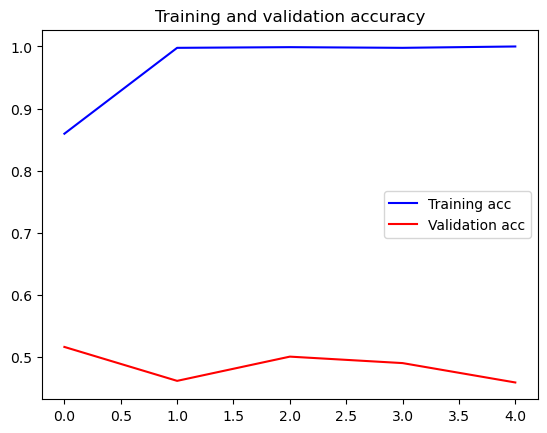

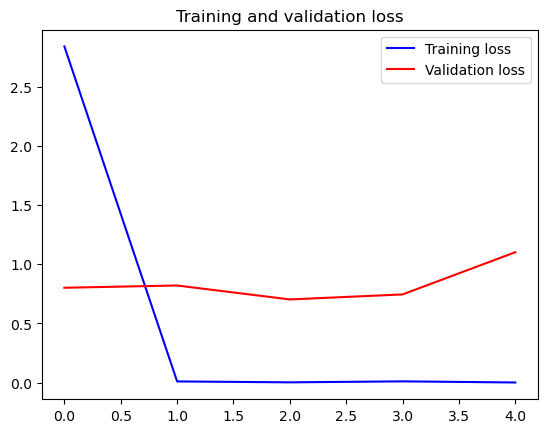

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.figure()

In [25]:
pred=new_model.predict(validation_generator)

42/42 [==============================] - 194s 5s/step


In [26]:
pred

array([[0.13911141, 0.8608886 ],
       [0.14915362, 0.85084635],
       [0.13496314, 0.8650368 ],
       ...,
       [0.14214192, 0.85785806],
       [0.1581564 , 0.8418436 ],
       [0.16377358, 0.83622646]], dtype=float32)